# Reduce 30-Day Readmissions Rate

<img src="https://raw.githubusercontent.com/katonic-dev/Katonic-ML-Marketplace/master/Reduce%2030-Day%20Readmissions%20Rate/reduce-30-day-readmission-rate.jpg?token=AQS2G3KAUQWGAA7W2BJ3YO3BZ3R6S" style="width: 1000px;"/>

The goal of this notebook is to correctly predict Hostpital Readmission Rate.

The dataset includes 10000 observations, and 51 features. The data is already labeled.

## Data Preparation

### Import Libraries

In [5]:
# Ignore Warning
import warnings
warnings.filterwarnings("ignore")

In [6]:
# For data wrangling 
import pandas as pd

# For visualization
import seaborn as sns
import plotly.express as px

pd.options.display.max_rows = None
pd.options.display.max_columns = None

In [16]:
# Read the data frame
df = pd.read_csv('hospital_readmission.csv', delimiter=',')
df.head()

,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide.metformin,glipizide.metformin,glimepiride.pioglitazone,metformin.rosiglitazone,metformin.pioglitazone,change,diabetesMed,readmitted,diag_1_desc,diag_2_desc,diag_3_desc
0,Caucasian,Female,[50-60),?,Elective,Discharged to home,Physician Referral,1,CP,Surgery-Neuro,35,4,21,0,0,0,723,723,719,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,False,Spinal stenosis in cervical region,Spinal stenosis in cervical region,"Effusion of joint, site unspecified"
1,Caucasian,Female,[20-30),[50-75),Urgent,Discharged to home,Physician Referral,2,UN,?,8,5,5,0,0,0,664,648,285,6,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,False,"First-degree perineal laceration, unspecified ...","Diabetes mellitus of mother, complicating preg...",Sideroblastic anemia
2,Caucasian,Male,[80-90),?,Not Available,Discharged/transferred to home with home healt...,NaN,7,MC,Family/GeneralPractice,12,0,21,0,0,1,481,428,276,9,>200,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,True,Pneumococcal pneumonia [Streptococcus pneumoni...,"Congestive heart failure, unspecified",Hyperosmolality and/or hypernatremia
3,AfricanAmerican,Female,[50-60),?,Emergency,Discharged to home,Transfer from another health care facility,4,UN,?,33,1,5,0,0,0,682,41,250,3,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,False,Cellulitis and abscess of face,Streptococcus infection in conditions classifi...,Diabetes mellitus without mention of complicat...
4,AfricanAmerican,Female,[50-60),?,Emergency,Discharged to home,Emergency Room,5,?,Psychiatry,31,0,13,0,0,0,296,250.01,298,7,None,None,Steady,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,False,"Bipolar I disorder, single manic episode, unsp...",Diabetes mellitus without mention of complicat...,Depressive type psychosis


In [17]:
print(f"Shape of the Data Set: {df.shape}")

Shape of the Data Set: (10000, 51)


At the moment the data is consist of 10000 observations and 51 columns from which `discharge_disposition_id`, `admission_source_id` are not required as these are specific to patiets.

In [18]:
df = df.drop(["weight", "age", "discharge_disposition_id", "admission_source_id"], axis=1)

In [19]:
# Check columns list and missing values
df.isnull().sum()

race                          0
gender                        0
admission_type_id           721
time_in_hospital              0
payer_code                    0
medical_specialty             0
num_lab_procedures            0
num_procedures                0
num_medications               0
number_outpatient             0
number_emergency              0
number_inpatient              0
diag_1                        0
diag_2                        0
diag_3                        0
number_diagnoses              0
max_glu_serum                 0
A1Cresult                     0
metformin                     0
repaglinide                   0
nateglinide                   0
chlorpropamide                0
glimepiride                   0
acetohexamide                 0
glipizide                     0
glyburide                     0
tolbutamide                   0
pioglitazone                  0
rosiglitazone                 0
acarbose                      0
miglitol                      0
troglita

We have missing values in `payer_code`, `medical_specialty`, `diag_2_desc`, `diag_3_desc` so we need to drop them to make better predicitons

In [33]:
# Handling missing values

df = df[df["payer_code"] != "?"]
df = df[df['medical_specialty'] != "?"]
df = df[df['race'] != "?"]
df = df[df["diag_2_desc"].notna()]
df = df[df["diag_3_desc"].notna()]

In [34]:
df.describe()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,2543.000000,2543.000000,2543.000000,2543.000000,2543.000000,2543.000000,2543.000000,2543.000000
mean,4.253244,39.906017,1.437279,15.629178,0.274479,0.172238,0.357059,6.875344
std,2.966566,19.263531,1.700852,9.050199,1.009088,1.036425,0.802188,1.933135
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,3.000000
25%,2.000000,30.000000,0.000000,10.000000,0.000000,0.000000,0.000000,5.000000
50%,3.000000,42.000000,1.000000,14.000000,0.000000,0.000000,0.000000,7.000000
75%,6.000000,52.000000,2.000000,19.000000,0.000000,0.000000,0.000000,9.000000
max,14.000000,113.000000,6.000000,81.000000,14.000000,42.000000,9.000000,9.000000


In [35]:
df.head()

,race,gender,admission_type_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide.metformin,glipizide.metformin,glimepiride.pioglitazone,metformin.rosiglitazone,metformin.pioglitazone,change,diabetesMed,readmitted,diag_1_desc,diag_2_desc,diag_3_desc
0,Caucasian,Female,Elective,1,CP,Surgery-Neuro,35,4,21,0,0,0,723,723,719,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,False,Spinal stenosis in cervical region,Spinal stenosis in cervical region,"Effusion of joint, site unspecified"
2,Caucasian,Male,Not Available,7,MC,Family/GeneralPractice,12,0,21,0,0,1,481,428,276,9,>200,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,True,Pneumococcal pneumonia [Streptococcus pneumoni...,"Congestive heart failure, unspecified",Hyperosmolality and/or hypernatremia
6,Caucasian,Female,Elective,6,MC,InternalMedicine,46,1,20,0,0,0,434,345,584,8,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,False,Cerebral thrombosis without mention of cerebra...,"Generalized nonconvulsive epilepsy, without me...",Acute kidney failure
10,Caucasian,Male,Urgent,14,MC,Surgery-Cardiovascular/Thoracic,45,2,44,0,0,0,997,428,511,9,None,>7,Down,No,No,No,No,No,Steady,Steady,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,False,"Nervous system complication, unspecified","Congestive heart failure, unspecified",Pleurisy without mention of effusion or curren...
11,AfricanAmerican,Male,Emergency,2,MC,Family/GeneralPractice,60,0,8,0,0,1,250.8,799,401,5,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,False,"Diabetes with other specified manifestations, ...",Other ill-defined and unknown causes of morbid...,Malignant essential hypertension


In [36]:
df1 = df.groupby('readmitted').agg({'number_inpatient': 'mean', 'number_outpatient': 'mean'})
fig = px.bar(df1)
fig.update_layout(
    uniformtext_minsize=8, uniformtext_mode='hide',
    title="Average no. of Inpatient and Outpatient Visits in the Preceding Year (True = Readmitted Patient)",
    xaxis_title="Average no. of Inpatient and Outpatient",
    yaxis_title="Re-admitted",
)
fig.show()

In [37]:
df1 = df.where(df['readmitted'] == 1).groupby('admission_type_id').agg({'readmitted': 'count'})
df2 = df.where(df['readmitted'] == 0).groupby('admission_type_id').agg({'readmitted': 'count'})
df_perc = (df1/(df2+df1))
fig = px.bar(df_perc, y='readmitted')
fig.update_layout(
    uniformtext_minsize=8, uniformtext_mode='hide',
    title="Probability of Readmission by Admission Type",
    xaxis_title="Admission Type Id",
    yaxis_title="Re-admitted",
)
fig.show()

In [38]:
df1 = df.groupby('readmitted').agg({'number_diagnoses': 'mean', 'num_lab_procedures': 'mean', 'num_medications':'mean'})
fig = px.bar(df1, color_discrete_sequence= px.colors.sequential.Purpor_r)
# fig = px.bar(df_perc, y='readmitted', color_discrete_sequence= px.colors.sequential.Purpor_r)
fig.update_layout(
    uniformtext_minsize=8, uniformtext_mode='hide',
    title="No. of Diagnoses, Procedures, and Medications Per Patient (True = Readmitted Patient)",
    xaxis_title="Re-admitted",
    yaxis_title="Count",
)
fig.show()

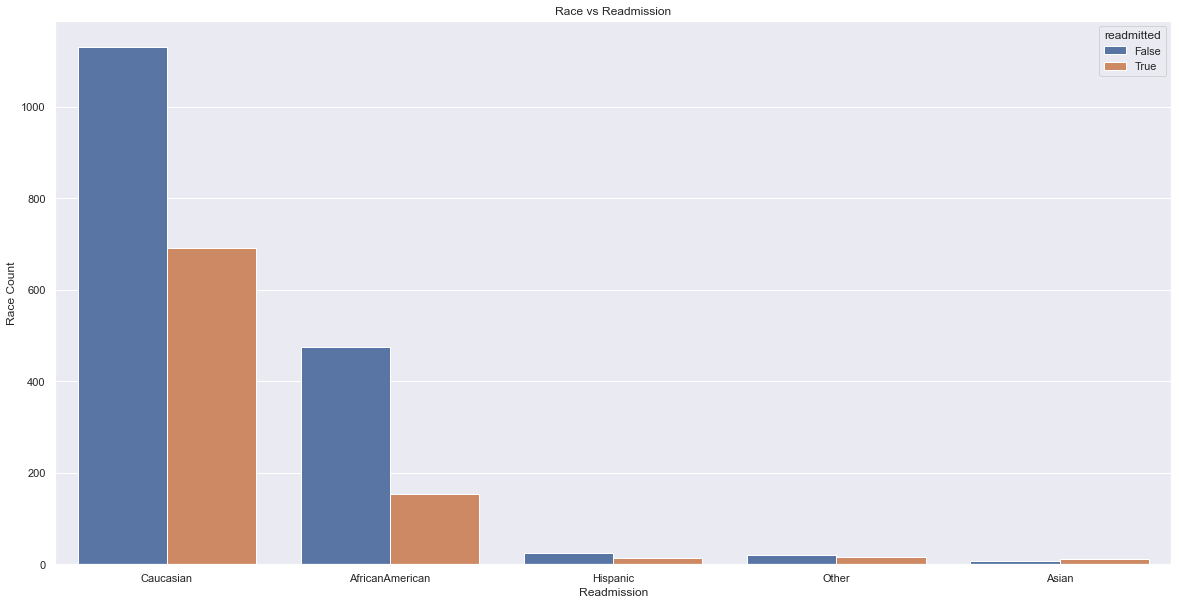

In [47]:
# We first review the 'Status' relation with categorical variables
sns.set(rc={'figure.figsize':(20,10)})
sns.countplot(x='race', hue='readmitted', data=df).set(title='Race vs Readmission', xlabel='Readmission', ylabel='Race Count');

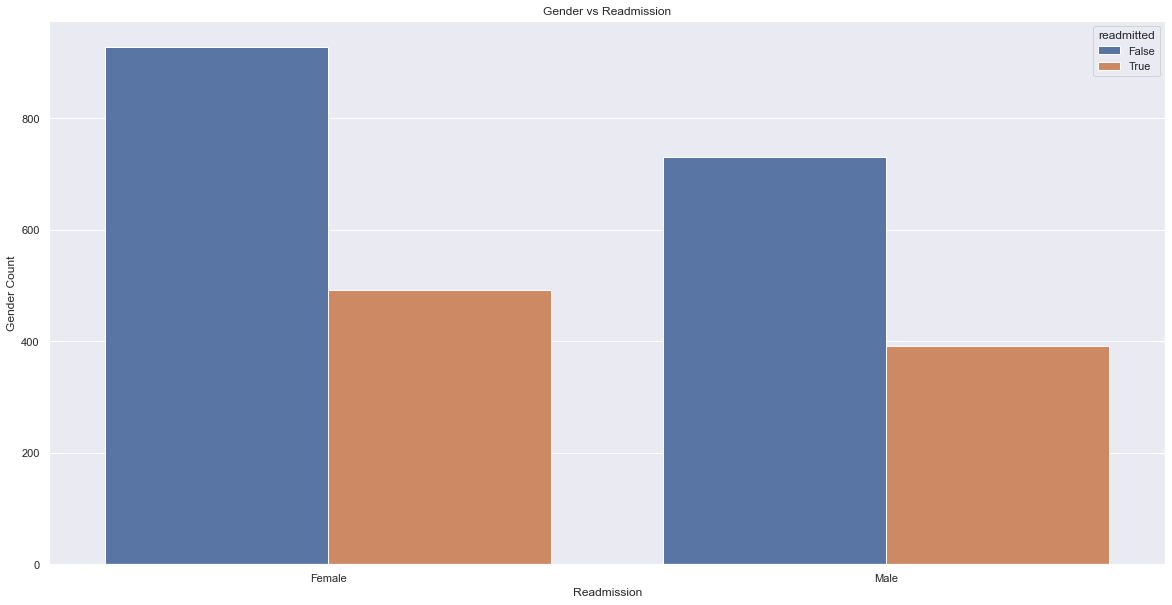

In [48]:
sns.countplot(x='gender', hue='readmitted', data=df).set(title='Gender vs Readmission', xlabel='Readmission', ylabel='Gender Count');

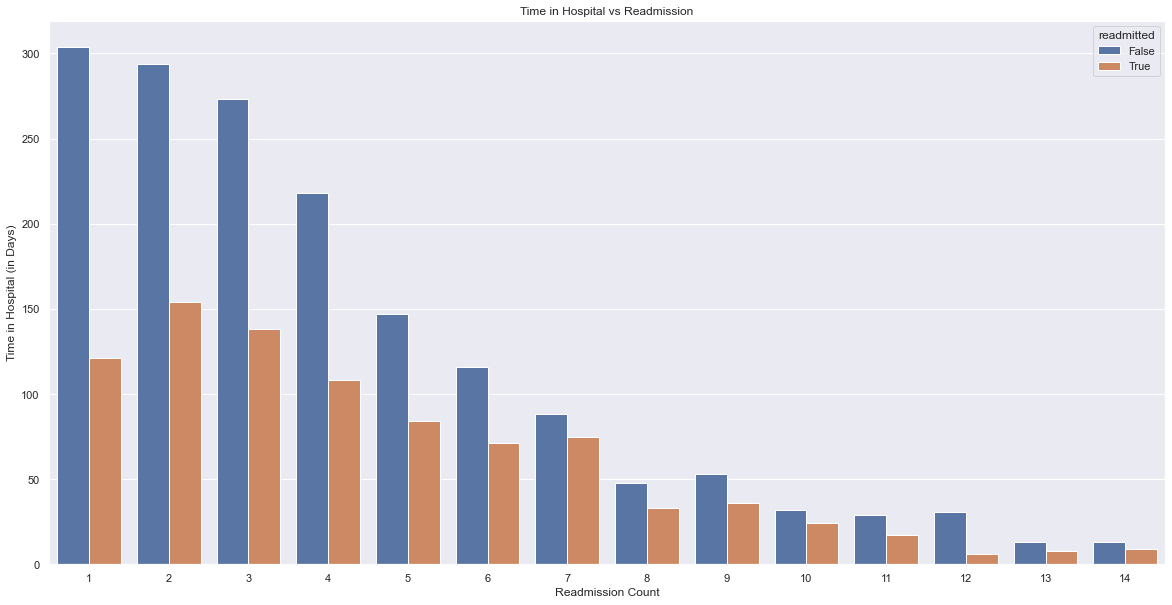

In [49]:
sns.countplot(x='time_in_hospital', hue='readmitted', data=df).set(title='Time in Hospital vs Readmission', xlabel='Readmission Count', ylabel='Time in Hospital (in Days)');

In [50]:
X = df.drop(["readmitted"], axis=1)
y = df["readmitted"]

## Model fitting and selection

In [51]:
import evalml
from evalml.automl import AutoMLSearch
problem_type = 'binary'

X_train, X_test, y_train, y_test = evalml.preprocessing.split_data(X, y, problem_type = problem_type, test_size=.2)

# perform a search across multiple pipelines and hyperparameters
automl = AutoMLSearch(X_train, y_train, problem_type=problem_type)
automl.search()

In [52]:
# the best pipeline is already refitted on the entire training data
best_pipeline = automl.best_pipeline
best_pipeline.predict(X_test)

8800     True
5537     True
7106     True
1654     True
2160    False
9873     True
9894     True
1065    False
937      True
6215    False
1054     True
4749     True
3178     True
1511     True
5589    False
5146     True
1878    False
8584    False
6251    False
4285     True
7953     True
5084     True
4823     True
8238     True
8986     True
2931     True
436     False
955     False
1434     True
5460     True
1672     True
2426     True
7554     True
5737    False
6095     True
7139    False
4672     True
4861    False
8194     True
4385     True
4905     True
2997     True
633      True
2926    False
754      True
1091     True
4223     True
6690     True
7094     True
9302     True
6718     True
7180    False
3735     True
3496     True
7939     True
7119     True
1848    False
3208     True
281      True
9509    False
4667     True
7132     True
3164     True
8927     True
3132     True
935     False
2238     True
7996     True
958      True
1378    False
6922     True
4148  

In [53]:
automl.rankings

,id,pipeline_name,search_order,mean_cv_score,standard_deviation_cv_score,validation_score,percent_better_than_baseline,high_variance_cv,parameters
0,6,Random Forest Classifier w/ Label Encoder + Im...,6,0.611339,0.003303,0.608083,94.907785,False,{'Imputer': {'categorical_impute_strategy': 'm...
1,8,Extra Trees Classifier w/ Label Encoder + Impu...,8,0.620671,0.002353,0.618076,94.830050,False,{'Imputer': {'categorical_impute_strategy': 'm...
2,5,CatBoost Classifier w/ Label Encoder + Imputer,5,0.662204,0.001590,0.661207,94.484099,False,{'Imputer': {'categorical_impute_strategy': 'm...
3,3,XGBoost Classifier w/ Label Encoder + Imputer ...,3,0.666061,0.022247,0.647496,94.451969,False,{'Imputer': {'categorical_impute_strategy': 'm...
4,1,Elastic Net Classifier w/ Label Encoder + Impu...,1,0.667608,0.039432,0.636556,94.439086,False,{'Imputer': {'categorical_impute_strategy': 'm...
5,2,Logistic Regression Classifier w/ Label Encode...,2,0.672865,0.038854,0.641956,94.395297,False,{'Imputer': {'categorical_impute_strategy': 'm...
6,4,LightGBM Classifier w/ Label Encoder + Imputer...,4,0.730416,0.043496,0.685805,93.915925,False,{'Imputer': {'categorical_impute_strategy': 'm...
7,7,Decision Tree Classifier w/ Label Encoder + Im...,7,1.407970,0.229435,1.672048,88.272161,False,{'Imputer': {'categorical_impute_strategy': 'm...
8,0,Mode Baseline Binary Classification Pipeline,0,12.005366,0.029411,11.971405,0.000000,False,{'Baseline Classifier': {'strategy': 'mode'}}


In [54]:
automl.describe_pipeline(automl.rankings.iloc[0]["id"])


*************************************************************************
* Random Forest Classifier w/ Label Encoder + Imputer + One Hot Encoder *
*************************************************************************

Problem Type: binary
Model Family: Random Forest

Pipeline Steps
1. Label Encoder
2. Imputer
	 * categorical_impute_strategy : most_frequent
	 * numeric_impute_strategy : mean
	 * categorical_fill_value : None
	 * numeric_fill_value : None
3. One Hot Encoder
	 * top_n : 10
	 * features_to_encode : None
	 * categories : None
	 * drop : if_binary
	 * handle_unknown : ignore
	 * handle_missing : error
4. Random Forest Classifier
	 * n_estimators : 100
	 * max_depth : 6
	 * n_jobs : -1

Training
Training for binary problems.
Total training time (including CV): 4.4 seconds

Cross Validation
----------------
             Log Loss Binary  MCC Binary  Gini   AUC  Precision    F1  Balanced Accuracy Binary  Accuracy Binary # Training # Validation
0                      0.608 

In [55]:
scores = best_pipeline.score(X_test, y_test,  objectives=["auc"])
print(scores['AUC'])

0.6649819617452862


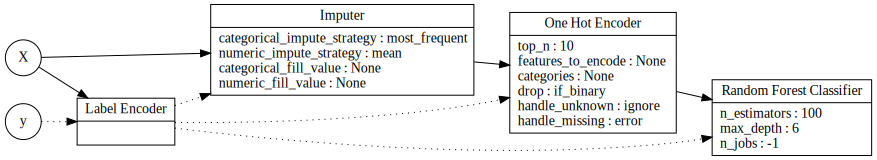

In [56]:
best_pipeline.graph()